# Data preprocessing

## Library


In [23]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Read data

In [24]:
data = pd.read_csv("https://www.mldata.io/download-csv-weka/german_credit_data/")

## Preparing data for modeling

### Variable types

#### Continuous  
- duration
- credit_amount
- age
- installment_rate
- present_residence
- dependents
- existing_credits


#### Nominal  
- credit_history
- purpose
- personal
- other_debtors
- property
- other_installment_plans
- housing
- job
- telephone
- foreign_worker
- present_employment

#### Ordinal
- checking_account_status
- savings  

in both cases amounts can be put in order, but having no account should be treated as different variable during encoding

## Change name 


In [25]:
data.telephone = data.telephone.map({"A191": 0, "A192": 1})
data.foreign_worker = data.foreign_worker.map({"A201": 1, "A202": 0})
data.job = data.job.map({"A171" : "unemployed/unskilled","A172": "unskilled-resident", "A173": "skilled_employee","A174": "management/self-employed"})
data.housing = data.housing.map({'A151' : 'rent', 'A152' : 'own', 'A153' : 'free'})
data.purpose = data.purpose.map({'A40': 'new car', 'A41': 'used car', 'A42': 'furniture/equipment', 'A43': 'radio/television', 'A44': 'domestic appliances', 'A45': 'repairs', 'A46': 'education', 'A47': 'vacation', 'A48':'retraining',
'A49': 'business', 'A410': 'others'})
data.other_debtors = data.other_debtors.map({'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'})
data.other_installment_plans = data.other_installment_plans.map({'A141': 'bank', 'A142': 'stores', 'A143': 'none'})

In [26]:
data.customer_type.replace([1,2], [1,0], inplace=True)
data.customer_type.value_counts()

1    700
0    300
Name: customer_type, dtype: int64

## Handling outliers

As said earlier, only observable outliers can appear in credit_ammount column. Let's take a closer look.


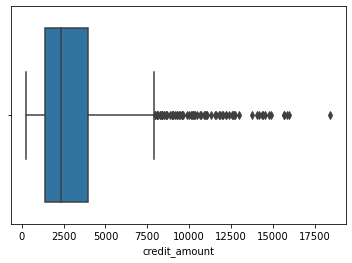

In [27]:
sns.boxplot(x = data['credit_amount'])

In [28]:
data_out = data[data.credit_amount>8000]
data_out.customer_type.mean()

0.45714285714285713

In [29]:
data_out = data[data.credit_amount>10000]
data_out.customer_type.mean()

0.4

In [30]:
data_out = data[data.credit_amount>13000]
data_out.customer_type.mean()

0.3076923076923077

In [31]:
data.customer_type.mean()

0.7

In [32]:
data[data.credit_amount<10000].customer_type.mean()

0.7125

In [33]:
len(data[data.credit_amount<10000])

960

Still these outliers don't differentiate distribution of customer_type that much, so keeping them might provide some valuable information and deffinately won't affect modeling badly.

## Adding gender

In [34]:
data['sex'] = data.personal.apply(lambda x: 1 if x in ['A91', 'A93', 'A94'] else 0) # male = 1, female = 0

## Adding info abour account presence


In [35]:
data['checking_account_exists'] = np.where(data['checking_account_status']=='A14', 0, 1)
data['savings_account_exists'] = np.where(data['savings']=='A65', 0, 1)

## Normalizing continous variables

In [36]:
from sklearn import preprocessing 

def normalize(df, columns):
    for column in columns:
        x = df[[column]].values.astype(float)
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        df[[column]] = x_scaled
    return df

In [22]:
data = normalize(data, ['duration', 'credit_amount', 'age', 'installment_rate', 'present_residence', 'dependents', 'existing_credits'])

## Save processed data

In [37]:
data.to_csv('../processed_data/out.csv', index=False)